# Linear regression - Basic Principles

## Libraries

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Fit models with scikit-learn

To be able to use the various models from `scikit-learn`, one has to provide the data in a format expected by `scikit-learn`.

Trainable models will have a `fit` method to adjust the model to the data set. The `fit` function looks typically like this:
```
fit(X, y)
```
The parameters are:

* Training data `X`: array-like, sparse matrix of shape `(n_samples, n_features)`
* Target values `y`: array-like of shape `(n_samples, )`

### An example
Let's define a data set with 4 samples and 2 features: 

In [2]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

The features matrix `X` has the structure:
* each row is a sample
* each sample has a same number of features (two in our example): they are the columns of the matrix `X`

In [3]:
X.shape

(4, 2)

The target values (or labels) are a simple list, where each entry is the target value of the samples of the features X:

In [4]:
y = np.array([6, 8, 9, 11])
y

array([ 6,  8,  9, 11])

In [5]:
y.shape

(4,)

## Data

To illustrate how to perform linear regression in [`scikit-learn`](https://scikit-learn.org/stable/) we will generate a synthetic data set.

The the data are generated based on the equation $y = w_o + w_1 x + \epsilon$, where $\epsilon$ is some random noise we add. 

We start be defining the values of $w_o$ and $w_1$.

In [6]:
wo = -1.0
w1 = +2.0

### Generate a data set

We generate a data set of $m$ points by adding Gaussian noise $\epsilon \sim N(0,\sigma)$ to the ideal model 

In [7]:
sigma = 0.25
m = 25

X = np.random.rand(m)
y = wo + w1*X + np.random.normal(0, sigma, m)

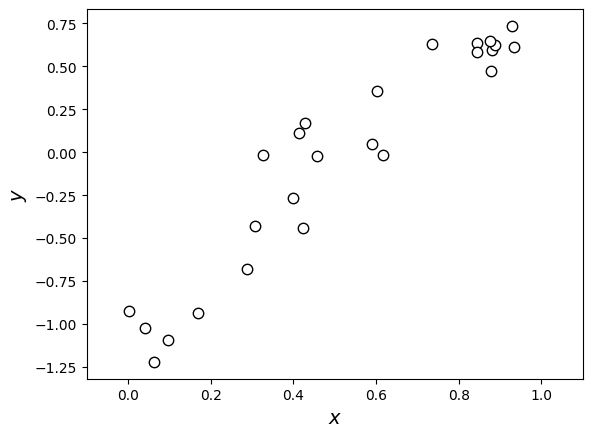

In [8]:
plt.plot(X, y, "k.", markersize=15, markerfacecolor='white')
plt.xlim([-0.1, 1.1])
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

## Train linear models with Scikit-Learn

We aim to fit a linear model to our data. In other words we want to fit a model like this:
    
$y = w_o + w_1 x$

This can be achieved with a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) object:

In [9]:
reg = LinearRegression()

Before being able to train this model, we need to reshape our `X` values. Indeed, our `X` values look like this:

In [10]:
X

array([0.88071349, 0.73464807, 0.45714494, 0.06351412, 0.04204008,
       0.61800886, 0.30688736, 0.09748053, 0.32619195, 0.42754033,
       0.60209366, 0.88755489, 0.87502938, 0.58970659, 0.42400998,
       0.2890922 , 0.84474122, 0.00160695, 0.16883394, 0.84372211,
       0.41259954, 0.93470368, 0.92821137, 0.8779781 , 0.39883048])

This is a list of the x-coordinates of our data points. Scikit-learn expects an array-like, sparse matrix, of shape `(n_samples, n_features)`.<br>
This can be obtained with the [`reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) method from `numpy` like this:

In [11]:
# Reshape X into an array as required by sciKit-learn (column vector with the features)
X_b = X.reshape((-1, 1))

In [12]:
# Check that this is now the correct format
X_b

array([[0.88071349],
       [0.73464807],
       [0.45714494],
       [0.06351412],
       [0.04204008],
       [0.61800886],
       [0.30688736],
       [0.09748053],
       [0.32619195],
       [0.42754033],
       [0.60209366],
       [0.88755489],
       [0.87502938],
       [0.58970659],
       [0.42400998],
       [0.2890922 ],
       [0.84474122],
       [0.00160695],
       [0.16883394],
       [0.84372211],
       [0.41259954],
       [0.93470368],
       [0.92821137],
       [0.8779781 ],
       [0.39883048]])

The `y` values do not need any modification as they already have the correct shape.

We can proceed with the training of the model:

In [13]:
# Fit data using standard method from scikit-learn
reg.fit(X_b, y)

LinearRegression()

Once the model is trained, we can get various useful information from it. In case of linear regression these are:

In [14]:
# coefficient of determination R**2 of the prediction.
reg.score(X_b, y)

0.9028972260326926

In [15]:
# Feature weights (here just one: w_1)
reg.coef_

array([1.96743422])

In [16]:
# Intercept (i.e. w_o)
reg.intercept_

-1.059290257688659

## Making predictions

Once the model is trained with the `fit()` method, it becomes possible to make predictions. For this we use the `predict()` method.

In [17]:
# predicting the value of y for x=0.5:
reg.predict([[0.5]])

array([-0.07557315])

In [18]:
# predicting the values of y for x=0.1, 0.2 and 0.3:
reg.predict([[0.1],
             [0.2],
             [0.3]])

array([-0.86254684, -0.66580341, -0.46905999])

A plot is always better than many numbers

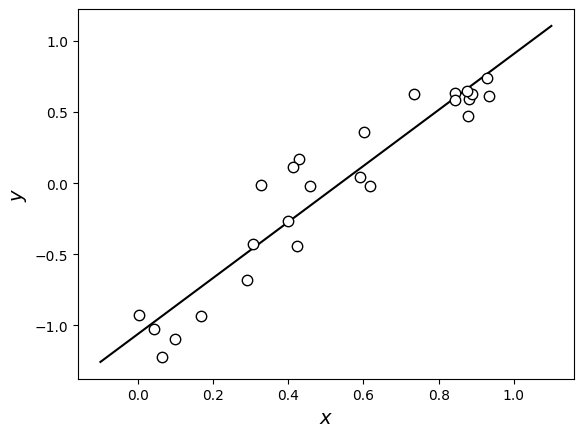

In [19]:
X_fit = [[-0.1], [1.1]]
y_fit = reg.predict(X_fit)

# Plotting data set and the fitted model
plt.plot(X_fit, y_fit, "k-")
plt.plot(X, y, "k.", markersize=15, markerfacecolor='white')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

An alternative way to visualize the quality of the predictions is to plot the predicted values versus the actual values.<br>
This method is particularly useful in more complex data sets which have more than one feature.<br>
Usually one adds the line $y=x$ to help in reading the graph.

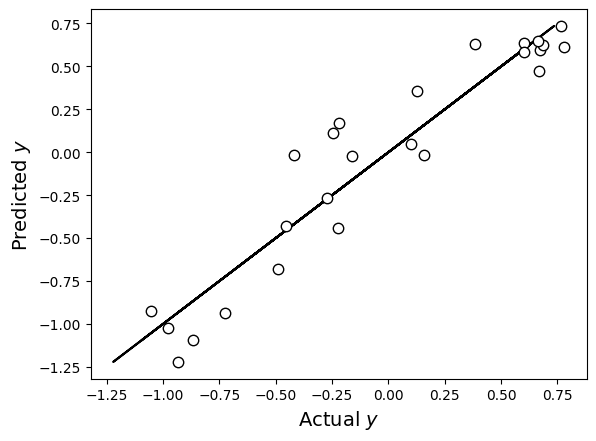

In [20]:
y_pred = reg.predict(X_b)

plt.plot(y, y, "k-")
plt.plot(y_pred, y, "k.", markersize=15, markerfacecolor='white')
plt.xlabel('Actual $y$', fontsize=14)
plt.ylabel('Predicted $y$', fontsize=14)
plt.show()

## Errors of predictions

In machine learning, the concept of error needs to be carefully analyzed and defined. We will do this later in the course. 
In this first example we are going to compute the errors you will know as 'residuals' from your undergraduate classes in numerical methods. 

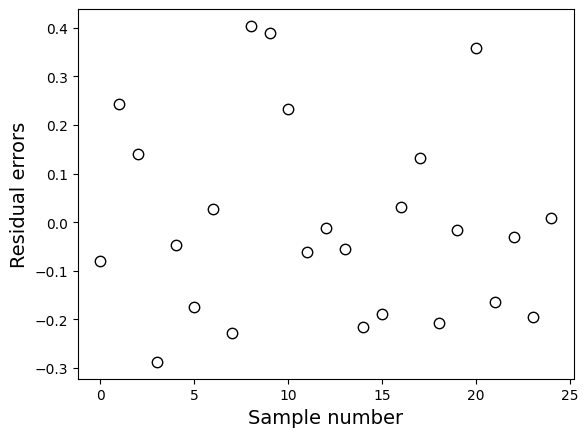

In [21]:
# residual errors
err = y - reg.predict(X_b)

# Plot
plt.plot(err, "k.", markersize=15, markerfacecolor='white')
plt.xlabel('Sample number', fontsize=14)
plt.ylabel('Residual errors', fontsize=14)
plt.show()

Statistical plots, such as histograms and box-plots are often used too.

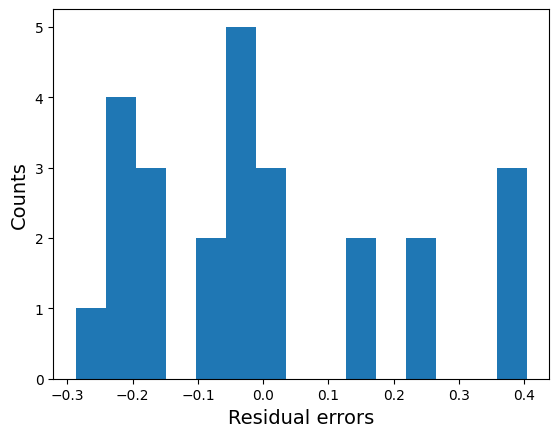

In [22]:
plt.hist(err, bins=15)
plt.xlabel('Residual errors', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

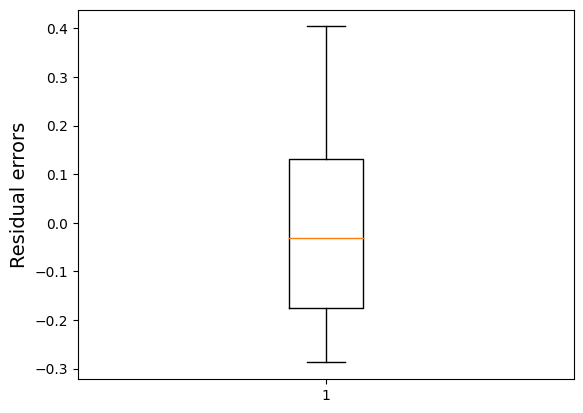

In [23]:
plt.boxplot(err)
plt.ylabel('Residual errors', fontsize=14)
plt.show()